# Exploración de datos

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [62]:
#Loading the data.
db = pd.read_csv('../data/raw/framingham.csv')
nona = pd.read_csv('../data/interim/dfnona.csv')
knn = pd.read_csv('../data/interim/dfknn.csv')

## Summary statistics

In [29]:
db.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [30]:
db.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [31]:
db.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [32]:
db.shape

(4240, 16)

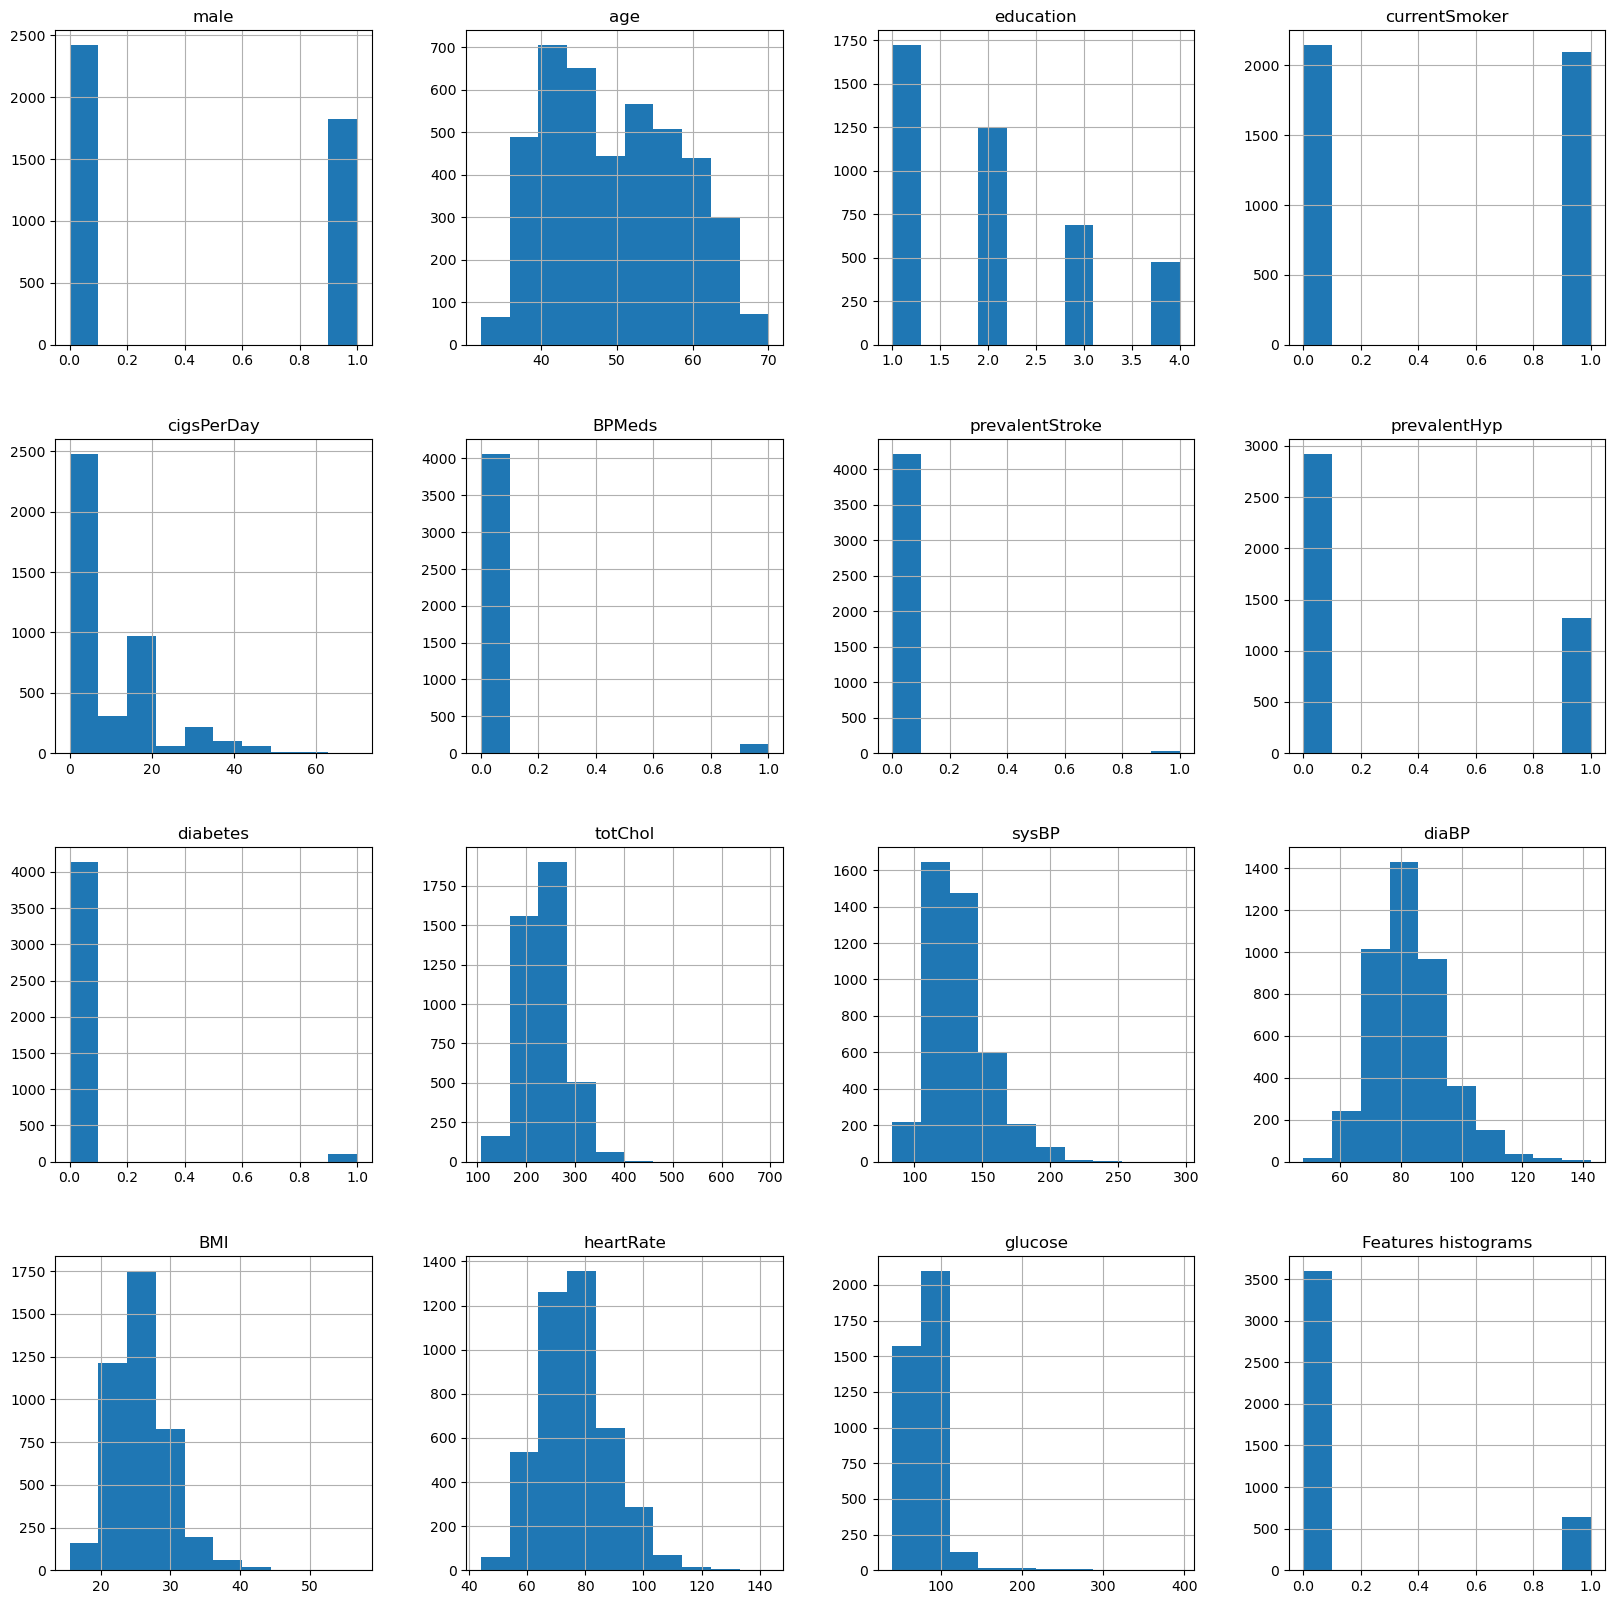

In [54]:
db.hist(figsize=(20,20))
plt.title('Features histograms')
plt.show()

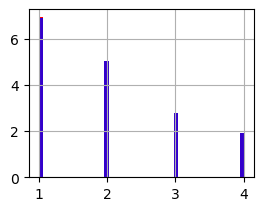

In [34]:
fig = plt.figure()
ax = fig.add_subplot(222)
db['education'].hist(bins = 50, ax = ax, density = True , color = 'red')
nona['education'].hist(bins = 50, ax = ax, density = True , color = 'blue', alpha = 0.8)
plt.show()

In [35]:
nona.isnull().sum()

male                 0
age                  0
education            0
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose            331
TenYearCHD           0
dtype: int64

Exploration of glucose column

In [36]:
nona.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Text(0.5, 1.0, 'Correlation beetwen features')

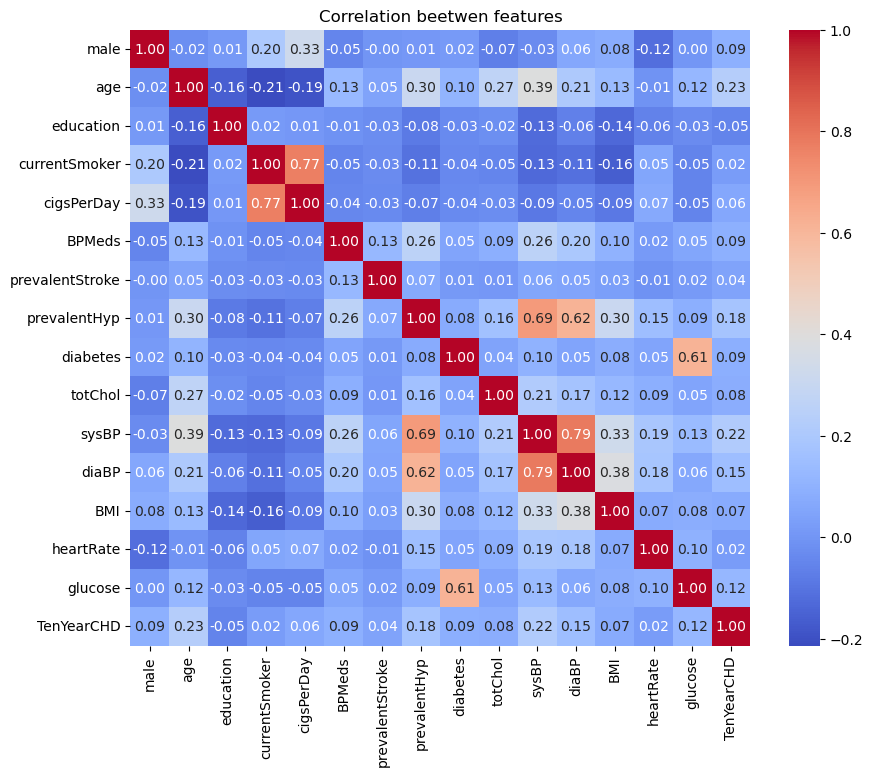

In [53]:
correlation = nona.corr()
correlation2 = correlation.drop(['TenYearCHD'],axis=0)
correlation2 = correlation2.drop(['TenYearCHD'],axis=1)
plt.figure(figsize=(10,8))
sns.heatmap(correlation,annot=True,fmt='.2f',cmap='coolwarm')
plt.title('Correlation beetwen features')

In [51]:
correlation['glucose'].sort_values(ascending=False)[1:]

diabetes           0.614820
sysBP              0.134651
TenYearCHD         0.121990
age                0.118349
heartRate          0.097074
prevalentHyp       0.086942
BMI                0.083683
diaBP              0.063540
BPMeds             0.054232
totChol            0.049884
prevalentStroke    0.016061
male               0.002940
education         -0.031998
currentSmoker     -0.053242
cigsPerDay        -0.053726
Name: glucose, dtype: float64

In [52]:
correlation2['glucose'].sort_values(ascending=False)[1:]

diabetes           0.614820
sysBP              0.134651
age                0.118349
heartRate          0.097074
prevalentHyp       0.086942
BMI                0.083683
diaBP              0.063540
BPMeds             0.054232
totChol            0.049884
prevalentStroke    0.016061
male               0.002940
education         -0.031998
currentSmoker     -0.053242
cigsPerDay        -0.053726
Name: glucose, dtype: float64

Text(0.5, 1.0, 'Glucose levels distribution')

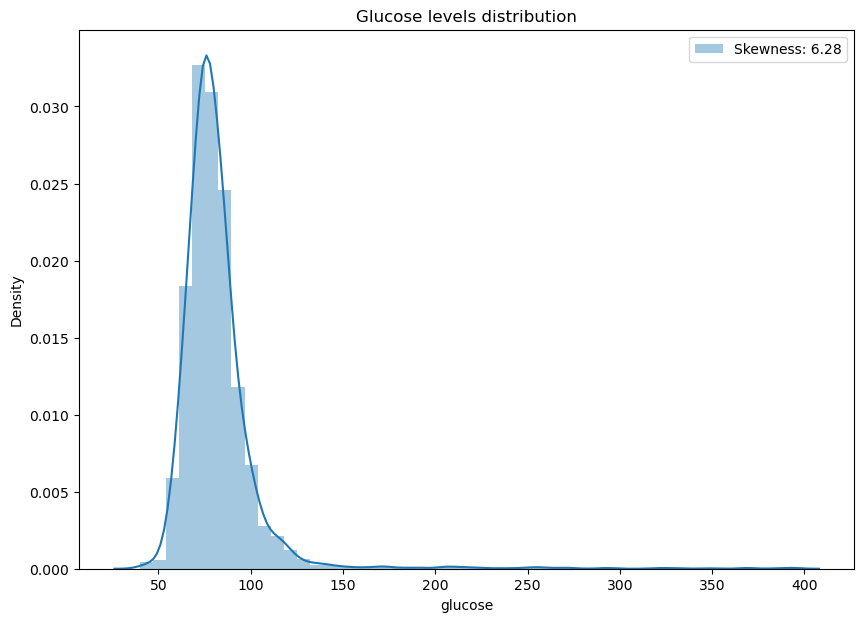

In [59]:
plt.figure(figsize=(10,7))
sns.distplot(nona['glucose'], label= 'Skewness: {:.2f}'.format(nona['glucose'].skew()))
plt.legend(loc = 'best')
plt.title('Glucose levels distribution')

In [60]:
nona['glucose'].describe()

count    3658.000000
mean       81.852925
std        23.904164
min        40.000000
25%        71.000000
50%        78.000000
75%        87.000000
max       394.000000
Name: glucose, dtype: float64

In [65]:
knn.isnull().sum()

male                 0
age                  0
education            0
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose            331
TenYearCHD           0
dtype: int64